4/4 [==============================] - 0s 2ms/step


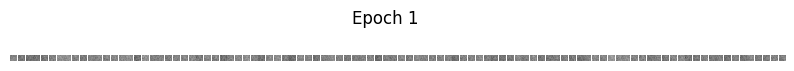

4/4 [==============================] - 0s 2ms/step


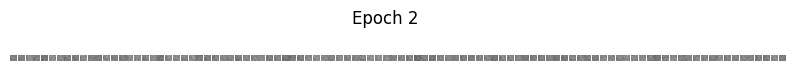

4/4 [==============================] - 0s 2ms/step


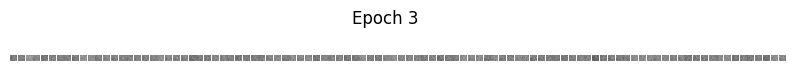

4/4 [==============================] - 0s 2ms/step


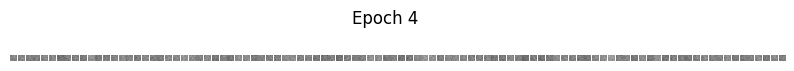

4/4 [==============================] - 0s 2ms/step


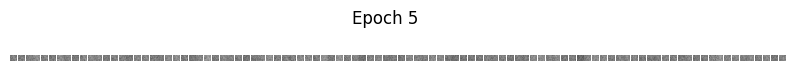

4/4 [==============================] - 0s 2ms/step


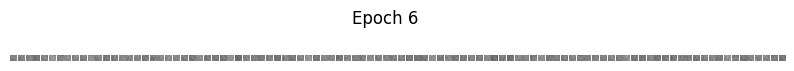

4/4 [==============================] - 0s 2ms/step


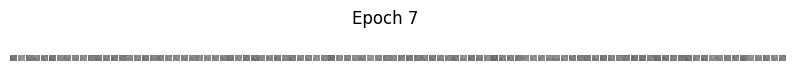

4/4 [==============================] - 0s 2ms/step


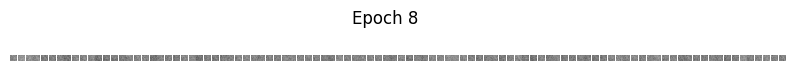

4/4 [==============================] - 0s 2ms/step


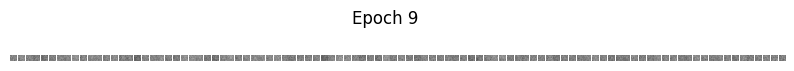

4/4 [==============================] - 0s 2ms/step


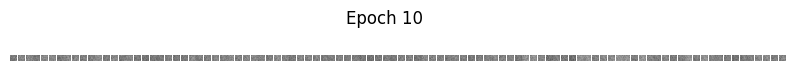

4/4 [==============================] - 0s 2ms/step


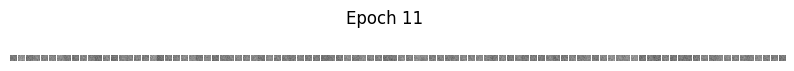

4/4 [==============================] - 0s 1ms/step


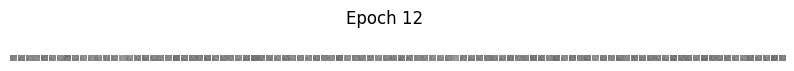

4/4 [==============================] - 0s 2ms/step


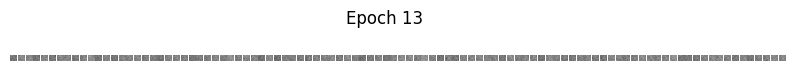

4/4 [==============================] - 0s 3ms/step


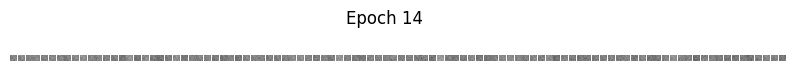

4/4 [==============================] - 0s 1ms/step


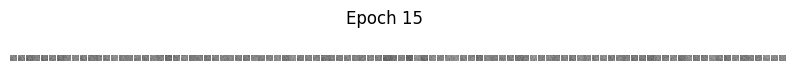

4/4 [==============================] - 0s 2ms/step


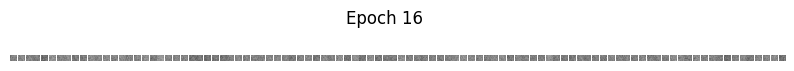

4/4 [==============================] - 0s 2ms/step


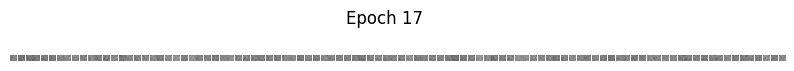

4/4 [==============================] - 0s 2ms/step


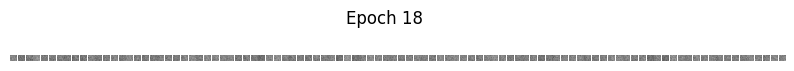

4/4 [==============================] - 0s 2ms/step


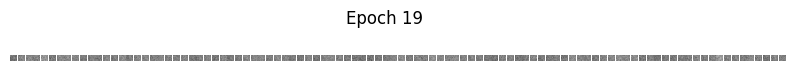

4/4 [==============================] - 0s 2ms/step


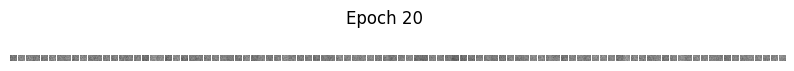

4/4 [==============================] - 0s 2ms/step


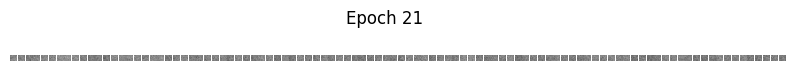

4/4 [==============================] - 0s 1ms/step


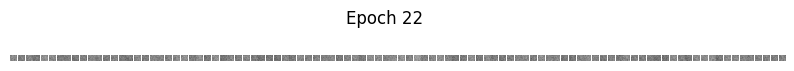

4/4 [==============================] - 0s 2ms/step


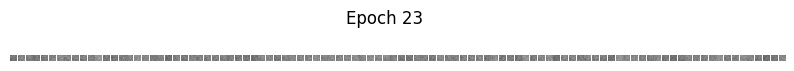

4/4 [==============================] - 0s 2ms/step


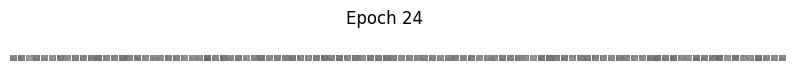

4/4 [==============================] - 0s 1ms/step


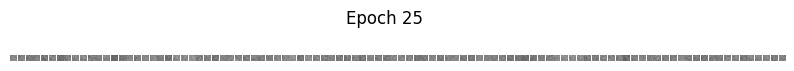

4/4 [==============================] - 0s 3ms/step


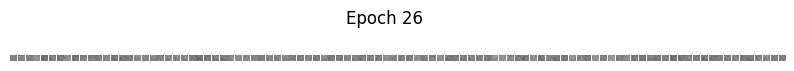

4/4 [==============================] - 0s 1ms/step


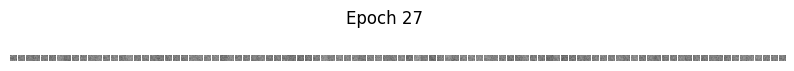

4/4 [==============================] - 0s 2ms/step


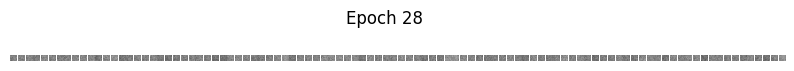

4/4 [==============================] - 0s 2ms/step


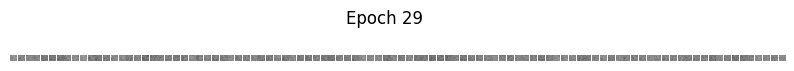

4/4 [==============================] - 0s 1ms/step


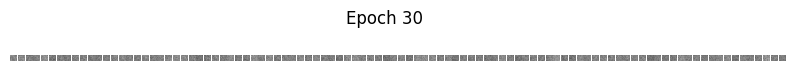

4/4 [==============================] - 0s 2ms/step


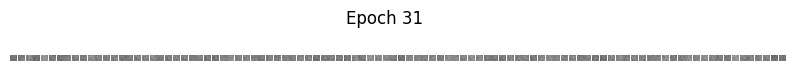

4/4 [==============================] - 0s 2ms/step


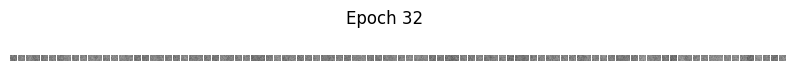

4/4 [==============================] - 0s 1ms/step


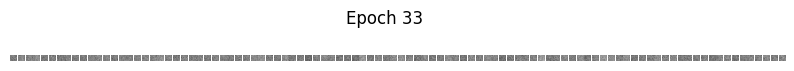

4/4 [==============================] - 0s 2ms/step


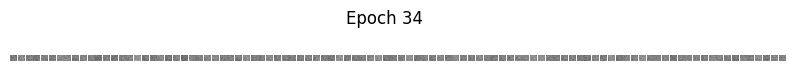

4/4 [==============================] - 0s 2ms/step


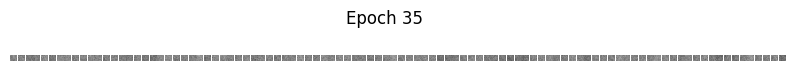

4/4 [==============================] - 0s 2ms/step


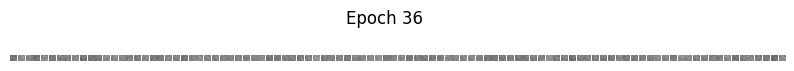

4/4 [==============================] - 0s 1ms/step


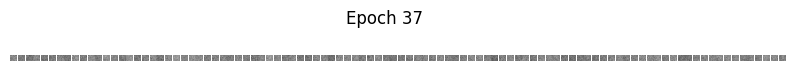

4/4 [==============================] - 0s 2ms/step


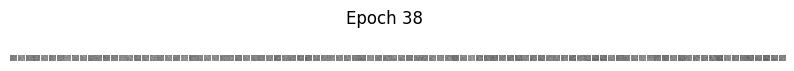

4/4 [==============================] - 0s 2ms/step


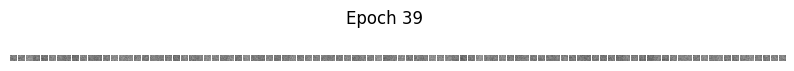

4/4 [==============================] - 0s 2ms/step


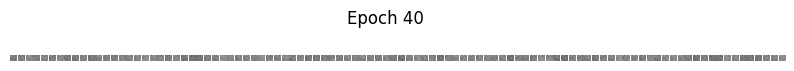

4/4 [==============================] - 0s 2ms/step


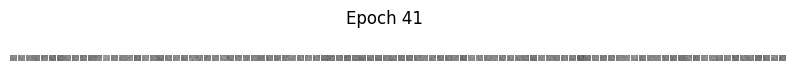

4/4 [==============================] - 0s 2ms/step


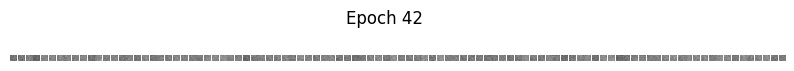

4/4 [==============================] - 0s 2ms/step


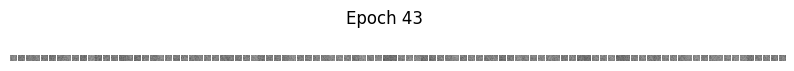

4/4 [==============================] - 0s 2ms/step


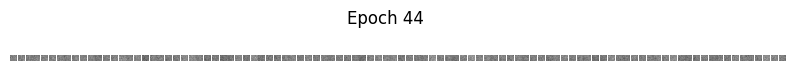

4/4 [==============================] - 0s 2ms/step


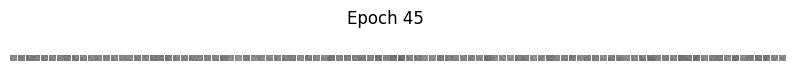

4/4 [==============================] - 0s 2ms/step


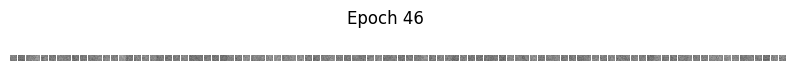

4/4 [==============================] - 0s 2ms/step


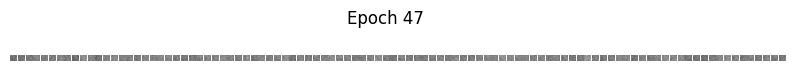

4/4 [==============================] - 0s 2ms/step


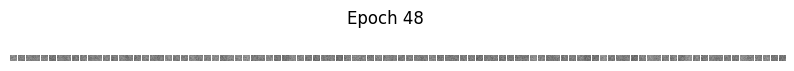

4/4 [==============================] - 0s 2ms/step


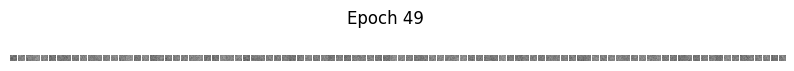

4/4 [==============================] - 0s 2ms/step


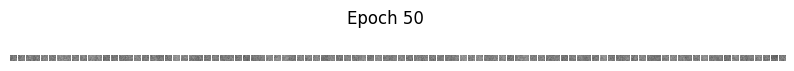

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Parametry modelu GAN
latent_dim = 100
num_classes = 10
img_shape = (28, 28, 1)

# Funkcja generująca losowy szum dla generatora
def generate_latent_points(latent_dim, n_samples, num_classes):
    latent_points = np.random.randn(n_samples, latent_dim)
    labels = np.random.randint(0, num_classes, n_samples)
    return latent_points, labels

# Funkcja budująca generator
def build_generator(latent_dim, num_classes):
    model = models.Sequential()

    model.add(layers.Dense(128, input_dim=latent_dim + num_classes, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(784, activation='sigmoid'))
    model.add(layers.Reshape((28, 28, 1)))

    return model

# Funkcja budująca dyskryminator
def build_discriminator(img_shape, num_classes):
    model = models.Sequential()

    model.add(layers.Flatten(input_shape=img_shape))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes + 1, activation='softmax'))

    return model

# Funkcja budująca model GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False

    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)

    return model

# Funkcja trenująca generator przykładów
def train_generator(generator, discriminator, gan, epochs, batch_size, num_classes):
    for epoch in range(epochs):
        latent_points, labels = generate_latent_points(latent_dim, batch_size, num_classes)
        generated_images = generator.predict(np.hstack((latent_points, tf.keras.utils.to_categorical(labels, num_classes))))

        plt.figure(figsize=(10, 1))
        for i in range(num_classes * 10):
            plt.subplot(1, num_classes * 10, i+1)
            plt.imshow(generated_images[i, :, :, 0], cmap='gray')
            plt.axis('off')
        plt.suptitle(f'Epoch {epoch + 1}')
        plt.show()

        # Trening generatora poprzez GAN
        gan_labels = tf.keras.utils.to_categorical(labels, num_classes + 1)
        gan_labels = gan_labels[:, :-1]  # Usuń ostatnią kolumnę
        gan_loss = gan.train_on_batch(np.hstack((latent_points, gan_labels)), tf.keras.utils.to_categorical(labels, num_classes + 1))

# Tworzenie modeli
generator = build_generator(latent_dim, num_classes)
discriminator = build_discriminator(img_shape, num_classes)
gan = build_gan(generator, discriminator)

# Kompilacja modeli
discriminator.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])
gan.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam())

# Trenowanie generatora przykładów
train_generator(generator, discriminator, gan, epochs=50, batch_size=100, num_classes=num_classes)
